In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

## Linear Regrssion using neural netowrk with medical data

#### Data Preparation 
- Numarical Encoding - one hot encoding
- Training and Testing Data

In [2]:
tf.random.set_seed(42)
df_data = pd.read_csv('medical_data.csv')
display(df_data.head())

# One Hot Encoding
df_data = pd.get_dummies(df_data,dtype=int)
display(df_data.head())

df_data_x = df_data.drop('charges',axis=1)
df_data_y = df_data['charges']
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_data_x, df_data_y, test_size = 0.2,random_state=42) 
len(df_x_train),len(df_x_test)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


(1070, 268)

### Building & Compiling Model

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])
    


In [4]:
history = model.fit(df_x_train,df_y_train,epochs=100,verbose=0)    
model.evaluate(df_x_test,df_y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3606.8955 - mae: 3606.8955  


[3528.157958984375, 3528.157958984375]

<Axes: >

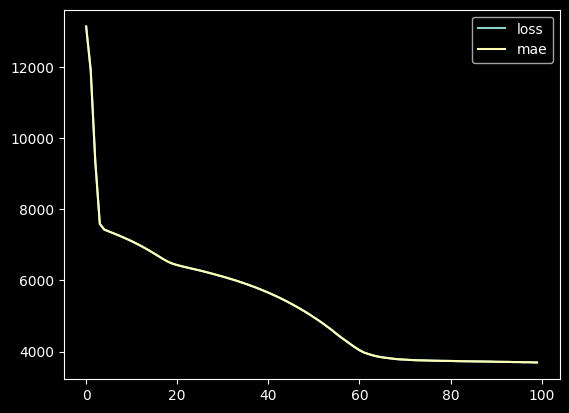

In [5]:
plt.style.use('dark_background')
pd.DataFrame(history.history).plot()

### Normalization of Data

<Axes: ylabel='Frequency'>

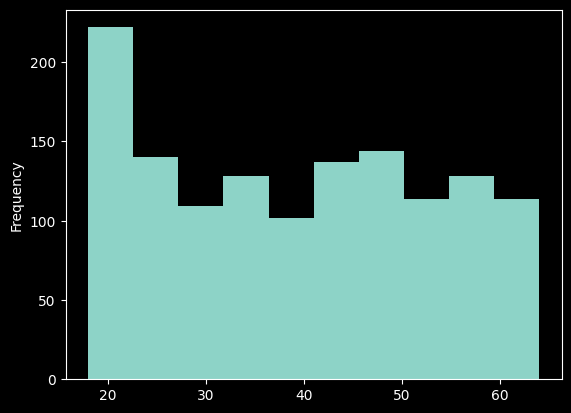

In [6]:
plt.style.use('dark_background')
df_data_x['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

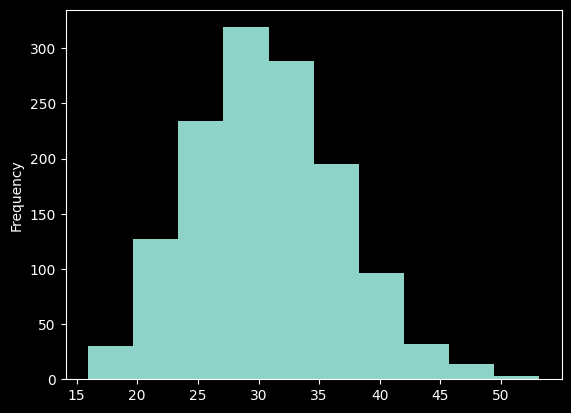

In [7]:
plt.style.use('dark_background')
df_data_x['bmi'].plot(kind='hist')

#### Data Preparation for Normalization

In [15]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
tf.random.set_seed(42)
df_data = pd.read_csv('medical_data.csv')
display(df_data.head())

# Create Training & Testing Data
df_data_x = df_data.drop('charges',axis=1)
df_data_y = df_data['charges']
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_data_x, df_data_y, test_size = 0.2,random_state=42) 
len(df_x_train),len(df_x_test)


# Column Transformer
col_tranformer = make_column_transformer(
    (StandardScaler(),['age','bmi','children']),
    (OneHotEncoder(),['sex','smoker','region'])
)

# Fit Column Transformer
col_tranformer.fit(df_x_train)
np_x_train = col_tranformer.transform(df_x_train)
np_x_test = col_tranformer.transform(df_x_test)
type(np_x_test)
np_x_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


array([[ 0.47222651, -1.75652513,  0.73433626, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.54331294, -1.03308239, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8987451 , -0.94368672, -0.91119211, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [-0.16755139,  2.82086429,  0.73433626, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.1120044 , -0.10932713, -0.91119211, ...,  0.        ,
         0.        ,  1.        ]])

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

tn_x_train = tf.convert_to_tensor(np_x_train,dtype=tf.float32)
tn_y_train = tf.convert_to_tensor(df_y_train,dtype=tf.float32)

tn_x_test = tf.convert_to_tensor(np_x_test,dtype=tf.float32)
tn_y_test = tf.convert_to_tensor(df_y_test,dtype=tf.float32)

In [10]:
history = model.fit(tn_x_train,tn_y_train,epochs=100,verbose=0)
model.evaluate(tn_x_test,tn_y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3452.2656 - mae: 3452.2656  


[3366.180908203125, 3366.180908203125]